#  <span style="text-align=center; color:DarkMagenta; font-family:Georgia; font-size:1.2em;"> **   _ M1- TP1 Apprentissage Automatique et Numérique_** </span>

# <span style="color:green; font-family:Georgia; font-size:1.5em;">1. Introduction

<span style="color:black; font-family:Georgia; font-size:1.3em;">Les objectifs de ce premier TP sont :</span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Exploration et Visualisation de données avec la bibliothèque __Pandas__</span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Implémentation d'une régression Linéaire Multiple avec la méthode de __moindres carrés__</span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire : </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Formule : $ y=\sum_{i=1}^N w_i x_i + b  $  </span>

<span style="color:black; font-family:Georgia; font-size:1.3em;">Regression Lineaire Simple : </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> $ N = 1 $ donc $ y= \beta_1 x_1 + \beta_0  $ </span>



# <span style="color:green; font-family:Georgia; font-size:1.5em;">2. Jeux de données 

<span style="font-family:Georgia; font-size:1.2em;">House Pricing is dataset describing the sale of individual residential property from 2006 to 2010. It contains a large number of explanatory variables involved in assessing home values. This data set gives you the opportunity to display the skills they had learned within the class.</span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will use the _House Pricing_ dataset for a regression project with a <span style="color:red">simple linear regression </span> </span>

<span style="font-family:Georgia; font-size:1.2em;"> * We will implement the  <span style="color:red"> Least Squares Method </span> to learn a prediction  model for the _House Pricing_ dataset</span>





# <span style="color:green; font-family:Georgia; font-size:1.5em;">3. Exploration  et Visualisation de données </span>
## <span style="color:brown; font-family:Gemesorgia; font-size:1.3em;">3.1 Objectifs </span>

1. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Importation de la base de données avec pandas </span>

2. <span style="color:blue; font-family:Georgia; font-size:1.2em;"> Calcul de la correlation entre les variables explicatives et la variable expliquée _SalePrice_  </span>
3. <span style="color:blue; font-family:Georgia; font-size:1.2em;">Choisir la variable explicative (exogène) </span>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <span style="color:brown; font-family:times; font-size:1.3em;">3.2 Load the training and testing data </span> 

In [4]:
houses_test= pd.read_csv('test.csv')
houses_test.head()
houses_train= pd.read_csv('train.csv')
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houses_train.get_dtype_counts()
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1199.000000,1199.000000,989.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1193.000000,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,600.000000,57.105922,70.081901,10558.848207,6.106756,5.568807,1971.357798,1984.992494,104.006706,444.801501,...,95.216013,45.986656,22.196831,3.656380,14.993328,1.910759,40.487073,6.308590,2007.812344,181442.497081
std,346.265794,42.686374,23.713505,10623.548705,1.382678,1.120485,30.059978,20.535058,183.605510,440.161545,...,124.055413,65.696803,61.529650,30.003428,54.789200,33.162113,482.523289,2.672094,1.318539,81098.986765
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,300.500000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,600.000000,50.000000,70.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,899.500000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,167.000000,712.500000,...,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1199.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


## <span style="color:brown; font-family:times; font-size:1.3em;">3.3 Variables Correlation with SalePrice </span>
<span style="color:black; font-family:Georgia; font-size:1.3em;">In this section we will search for the two most correlated variables.</span>


In [6]:
# Todo
# calculate the correlation between salePrice and all variables
# Keep the two most correlated variables to test them with the simple linear regression
import pandas as pd
import numpy as np


In [15]:
res = houses_train.corr().SalePrice
max = res[0]
max_var = res.index[0]

for i in range(1,res.size-1):
    if res[i] > max:
        max = res[i]
        max_var = res.index[i]

print(max)
#print(houses_train["OverallQual"][0])
print(max_var)
res.sort_values()
houses_train["OverallQual"].sort_values()

0.7894380947520541
OverallQual


375      1
533      1
916      2
1100     2
636      2
1090     3
1061     3
1045     3
88       3
342      3
968      3
1186     3
250      3
449      3
323      3
998      3
620      3
736      3
1000     3
74       3
710      3
441      4
106      4
207      4
99       4
97       4
537      4
89       4
649      4
90       4
        ..
378      9
987      9
477      9
683      9
481      9
963      9
480      9
566      9
644      9
618      9
610      9
932      9
161      9
178      9
527      9
540      9
825     10
691     10
185     10
591     10
224     10
1182    10
58      10
523     10
1169    10
389     10
440     10
994     10
583     10
515     10
Name: OverallQual, Length: 1199, dtype: int64

## <span style="color:brown; font-family:times; font-size:1.3em;">3.4 Plot SalePrice    </span> 

In [37]:
houses_train = pd.read_csv('train.csv')
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


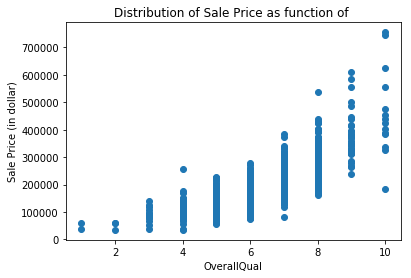

In [17]:
# Todo
# plot the SalePrices as function of your 2 variables (most correlated)
# add x label and Y label, the values and the scatter
plt.title("Distribution of Sale Price as function of ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price (in dollar)");
plt.scatter(houses_train["OverallQual"],houses_train["SalePrice"])


In [86]:
# <span style="color:green; font-family:Georgia; font-size:1.5em;">4. Regression Lineaire Simple (Python) </span>


# Todo 

# Estimation de \beta_1

# 


In [89]:
# Todo 
# Estimation de \beta_0

In [14]:
# Calculez le coeffecient de détermination R2 


In [15]:
# prédire les valeurs sur les données de Test




# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Evaluation du  modèle (RMSE)
  </span>


<span style="font-family:Georgia; font-size:1.2em;">La  racine  carrée  de l’erreur quadratique moyenne (RMSE) est une   autre  mesure  des  erreurs  de  prévision. La RMSE est définie par : $ RMSE = \sqrt{ \frac{1}{n} \sum (pred - y)^{2}} $.
</span>

<span style="font-family:Georgia; font-size:1.2em;">
Cette  mesure  pénalise  d'avantage  les  erreurs  importantes 
</span>

In [16]:
# Calculez la RMSE de votre modèle sur les données de test





# <span style="color:green; font-family:Georgia; font-size:1.5em;">5.  Pour aller plus loin </span>

<span style="font-family:Georgia; font-size:1.2em;">  
La standardisation des données consiste à centrer-réduire la matrice de fonctions caractéristiques  $X$ en retranchant pour chaque vecteur $X^{j}, j \in [1, N]$ sa moyenne et en divisant par son écart-type.
</span>


<span style="font-family:Georgia; font-size:1.2em;">
La formule d’usage est alors : $ ~~~~~~~~~~~  \forall j \in [1, N] ~~~~ X^{j} = \frac{X^{j}_{std} - \mu_{j}}{ \sigma^{2}_{j}}$

</span>

In [17]:
# Todo :
##  refaire le calcul des paramètres après un prétraitement sur les données d'apprentissage
##  1.  Centrer la variable --> soustraire son espérance à chacune de ses valeurs initiales
##  2.  Réduire la variable --> diviser toutes ses valeurs par son écart type.
## --------------------------
##    Soient  μ  l’espérance et σ l’écart-type des valeurs d’une variable aléatoire.
##    Centrer-réduire l’une de ses valeurs V revient alors à calculer : 
##          (V - μ ) / σ 
## --------------------------
##  3. re-éstimer les paramètre de modèle 
##  4. re-calculer la précision du modèle sur les données de test.




In [18]:
## Vos remarques !!

# <span style="color:green; font-family:Georgia; font-size:1.5em;">END</span>